In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier

In [20]:
train=pd.read_csv("trainKNN.txt",sep=',',header=None,names=['Id number','Refractive Index','Na','Mg','Al','Si','K','Ca','Ba','Fe','Glass Type'])
test=pd.read_csv("testKNN.txt",sep=',',header=None,names=['Id number','Refractive Index','Na','Mg','Al','Si','K','Ca','Ba','Fe','Glass Type'])
print(train['Glass Type'].value_counts())
train

2    73
1    67
7    26
3    14
5    10
6     6
Name: Glass Type, dtype: int64


,Id number,Refractive Index,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
191,207,1.51645,14.94,0.00,1.87,73.11,0.00,8.67,1.38,0.0,7
192,208,1.51831,14.39,0.00,1.82,72.86,1.41,6.47,2.88,0.0,7
193,209,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.0,7
194,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7


In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id number         196 non-null    int64  
 1   Refractive Index  196 non-null    float64
 2   Na                196 non-null    float64
 3   Mg                196 non-null    float64
 4   Al                196 non-null    float64
 5   Si                196 non-null    float64
 6   K                 196 non-null    float64
 7   Ca                196 non-null    float64
 8   Ba                196 non-null    float64
 9   Fe                196 non-null    float64
 10  Glass Type        196 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 17.0 KB


In [4]:
train.corr()

,Id number,Refractive Index,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass Type
Id number,1.000000,-0.073356,0.354835,-0.634686,0.529855,0.012142,0.039460,0.080707,0.443468,-0.139309,0.876191
Refractive Index,-0.073356,1.000000,-0.158559,-0.153610,-0.446641,-0.530520,-0.296570,0.821277,0.009425,0.104980,-0.166670
Na,0.354835,-0.158559,1.000000,-0.216384,0.234219,-0.196462,-0.248626,-0.278983,0.336526,-0.250335,0.484154
Mg,-0.634686,-0.153610,-0.216384,1.000000,-0.520530,-0.095263,-0.039185,-0.461244,-0.488494,0.066167,-0.714713
Al,0.529855,-0.446641,0.234219,-0.520530,1.000000,0.010147,0.335160,-0.284701,0.477098,-0.067659,0.640944
Si,0.012142,-0.530520,-0.196462,-0.095263,0.010147,1.000000,-0.181488,-0.197767,-0.162194,-0.058347,0.092812
K,0.039460,-0.296570,-0.248626,-0.039185,0.335160,-0.181488,1.000000,-0.321540,-0.019632,-0.011720,0.029423
Ca,0.080707,0.821277,-0.278983,-0.461244,-0.284701,-0.197767,-0.321540,1.000000,-0.100585,0.120076,-0.019545
Ba,0.443468,0.009425,0.336526,-0.488494,0.477098,-0.162194,-0.019632,-0.100585,1.000000,-0.030133,0.566769
Fe,-0.139309,0.104980,-0.250335,0.066167,-0.067659,-0.058347,-0.011720,0.120076,-0.030133,1.000000,-0.227560


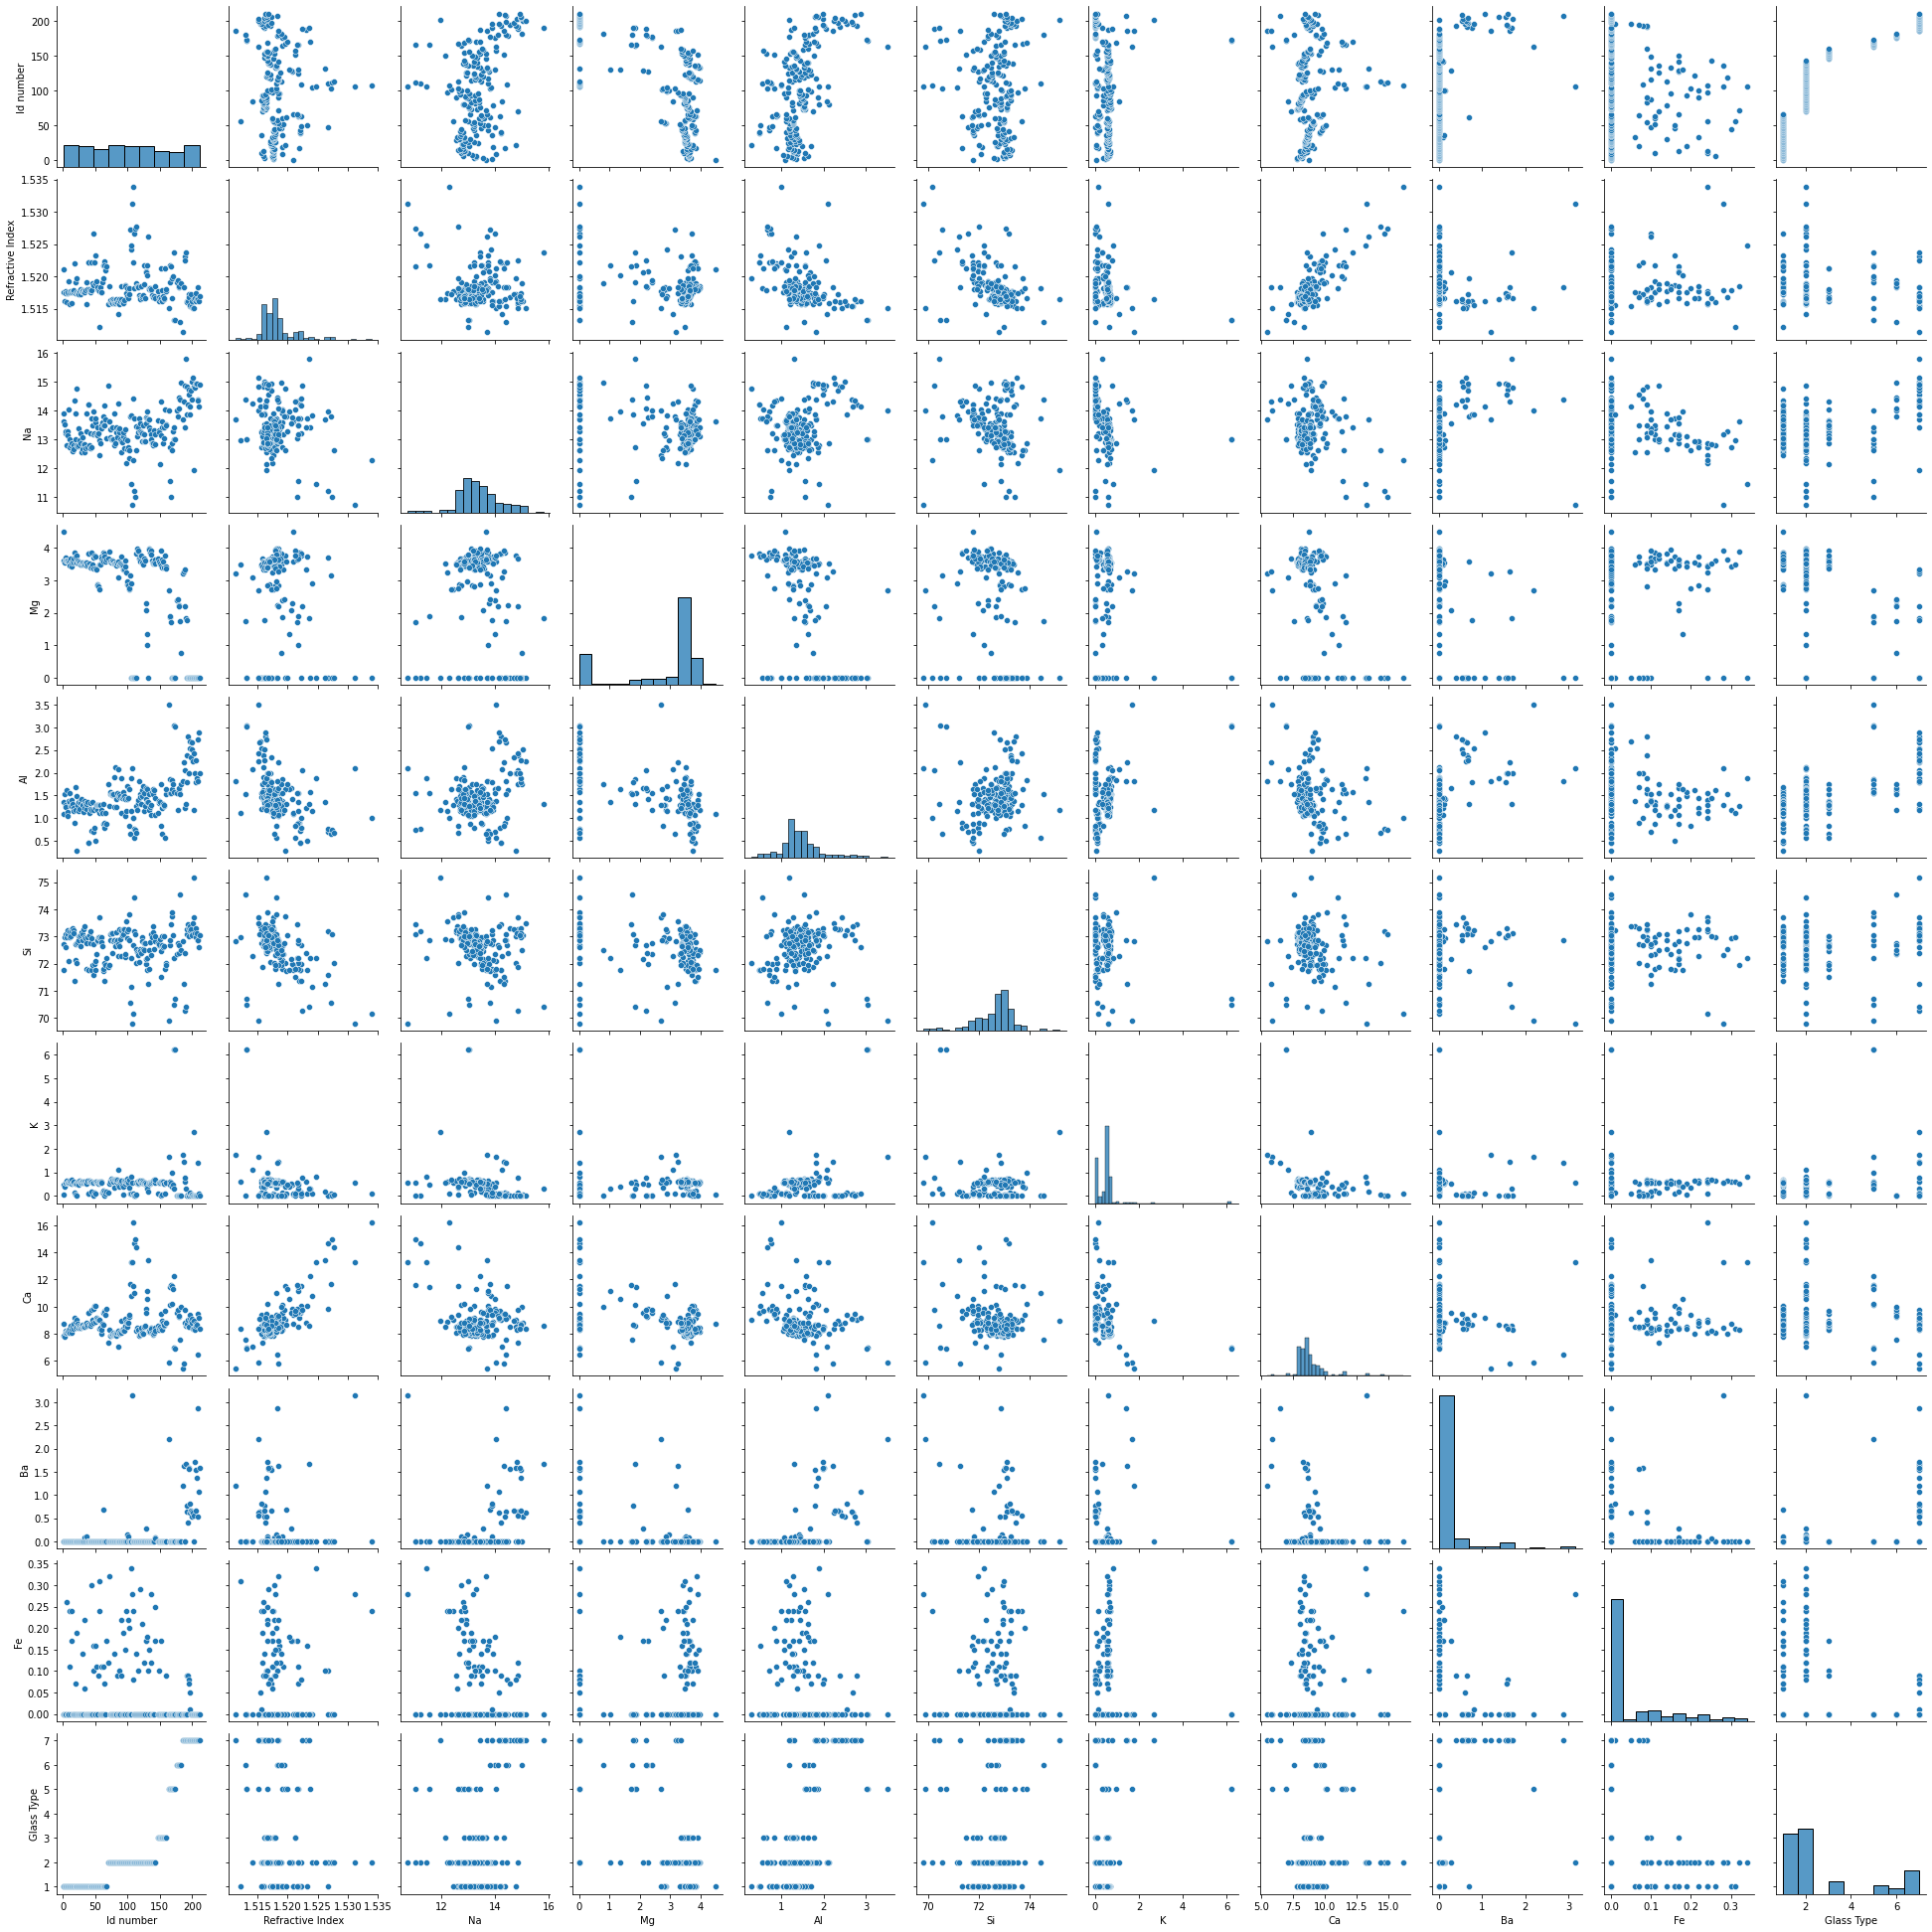

In [6]:
sns.pairplot(train)

In [22]:
X_train=train.drop(['Id number','Glass Type'],axis=1)
X_test=test.drop(['Id number','Glass Type'],axis=1)
Y_train=train['Glass Type']
Y_test=test['Glass Type']

In [23]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [24]:
Euclidean=KNeighborsClassifier(n_neighbors=6,p=2)
Manhatten=KNeighborsClassifier(n_neighbors=6,p=1)
Euclidean.fit(X_train,Y_train)
Manhatten.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=6, p=1)

In [25]:
Y_pred_E=Euclidean.predict(X_test)
Y_pred_M=Manhatten.predict(X_test)

In [26]:
cm_E=confusion_matrix(Y_test,Y_pred_E)
cm_M=confusion_matrix(Y_test,Y_pred_E)
print('confusion matrix of Euclidean','\n',cm_E)
print('confusion matrix of Manhatten','\n',cm_M)
cr_E=classification_report(Y_test,Y_pred_E)
cr_M=classification_report(Y_test,Y_pred_M)
print('report of Euclidean','\n',cr_E)
print('report of Manhatten','\n',cr_M)

confusion matrix of Euclidean 
 [[3 0 0 0 0 0]
 [1 2 0 0 0 0]
 [1 2 0 0 0 0]
 [0 2 0 1 0 0]
 [0 1 0 0 1 1]
 [0 0 0 0 0 3]]
confusion matrix of Manhatten 
 [[3 0 0 0 0 0]
 [1 2 0 0 0 0]
 [1 2 0 0 0 0]
 [0 2 0 1 0 0]
 [0 1 0 0 1 1]
 [0 0 0 0 0 3]]
report of Euclidean 
               precision    recall  f1-score   support

           1       0.60      1.00      0.75         3
           2       0.29      0.67      0.40         3
           3       0.00      0.00      0.00         3
           5       1.00      0.33      0.50         3
           6       1.00      0.33      0.50         3
           7       0.75      1.00      0.86         3

    accuracy                           0.56        18
   macro avg       0.61      0.56      0.50        18
weighted avg       0.61      0.56      0.50        18

report of Manhatten 
               precision    recall  f1-score   support

           1       0.43      1.00      0.60         3
           2       0.33      0.67      0.44         3
    

C:\Users\Jtobss\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jtobss\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jtobss\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jtobss\anaconda3\lib\site-packages\sklearn\

In [27]:
error_rate_E=[]
error_rate_M=[]
for i in range(1,40):
    Euclidean=KNeighborsClassifier(n_neighbors=i,p=2)
    Euclidean.fit(X_train,Y_train)
    Manhatten=KNeighborsClassifier(n_neighbors=i,p=1)
    Manhatten.fit(X_train,Y_train)
    pred_E_i=Euclidean.predict(X_test)
    pred_M_i=Manhatten.predict(X_test)
    error_rate_E.append(np.mean(pred_E_i != Y_test))
    error_rate_M.append(np.mean(pred_M_i != Y_test))

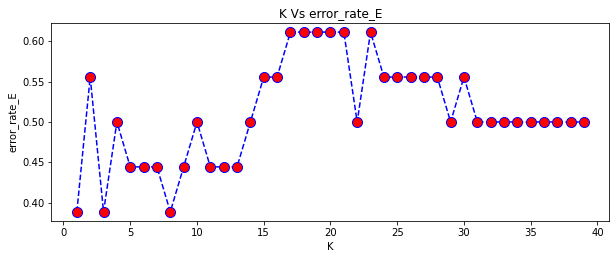

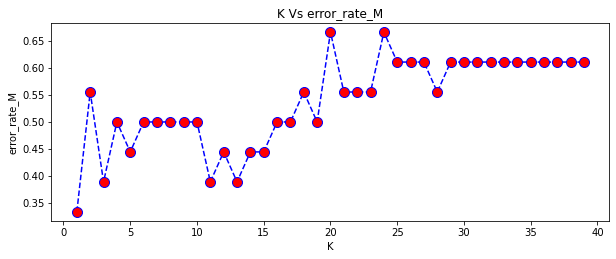

In [28]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.plot(range(1,40),error_rate_E,linestyle='dashed',marker='o',color='blue',markerfacecolor='red',markersize=10)
plt.xlabel('K')
plt.ylabel('error_rate_E')
plt.title('K Vs error_rate_E')
plt.show()
plt.figure(figsize=(10,8))
plt.subplot(2,1,2)
plt.plot(range(1,40),error_rate_M,linestyle='dashed',marker='o',color='blue',markerfacecolor='red',markersize=10)
plt.xlabel('K')
plt.ylabel('error_rate_M')
plt.title('K Vs error_rate_M')
plt.show()

from the above graph we can choose K value as 8 for Euclidean and 3 for Manhatten method

In [31]:
Euclidean=KNeighborsClassifier(n_neighbors=8)
Manhatten=KNeighborsClassifier(n_neighbors=3)
Euclidean.fit(X_train,Y_train)
Manhatten.fit(X_train,Y_train)
Y_pred_E=Euclidean.predict(X_test)
Y_pred_M=Manhatten.predict(X_test)

In [30]:
cm_E=confusion_matrix(Y_test,Y_pred_E)
cm_M=confusion_matrix(Y_test,Y_pred_M)
print('confusion matrix of Euclidean','\n',cm_E)
print('confusion matrix of Manhatten','\n',cm_M)
cr_E=classification_report(Y_test,Y_pred_E)
cr_M=classification_report(Y_test,Y_pred_M)
print('report of Euclidean','\n',cr_E)
print('report of Manhatten','\n',cr_M)

confusion matrix of Euclidean 
 [[3 0 0 0 0 0]
 [1 2 0 0 0 0]
 [0 3 0 0 0 0]
 [0 2 0 1 0 0]
 [0 0 0 0 2 1]
 [0 0 0 0 0 3]]
confusion matrix of Manhatten 
 [[3 0 0 0 0 0]
 [2 1 0 0 0 0]
 [0 2 1 0 0 0]
 [1 1 0 1 0 0]
 [0 1 0 0 2 0]
 [0 0 0 0 0 3]]
report of Euclidean 
               precision    recall  f1-score   support

           1       0.75      1.00      0.86         3
           2       0.29      0.67      0.40         3
           3       0.00      0.00      0.00         3
           5       1.00      0.33      0.50         3
           6       1.00      0.67      0.80         3
           7       0.75      1.00      0.86         3

    accuracy                           0.61        18
   macro avg       0.63      0.61      0.57        18
weighted avg       0.63      0.61      0.57        18

report of Manhatten 
               precision    recall  f1-score   support

           1       0.50      1.00      0.67         3
           2       0.20      0.33      0.25         3
    

C:\Users\Jtobss\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jtobss\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jtobss\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
